In [1]:
%pip install git+https://github.com/detly/gammatone.git

  Cloning https://github.com/detly/gammatone.git to c:\users\pc\appdata\local\temp\pip-req-build-txtivjb9
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/detly/gammatone.git 'C:\Users\pc\AppData\Local\Temp\pip-req-build-txtivjb9'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [2]:
python -m gammatone UrbanSound8K/audio/fold1/7383-3-0-0.wav -d 10

SyntaxError: invalid syntax (<ipython-input-2-2787e8c4edc0>, line 1)

In [1]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [2]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [4]:
metadata["class"].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [5]:
metadata["classID"].unique()

array([3, 2, 1, 0, 9, 6, 8, 5, 7, 4], dtype=int64)

In [6]:
hist_list=[]
for classID in metadata["classID"].unique():
    hist_list.append((metadata["classID"] == classID).sum())

In [7]:
print(hist_list)

[1000, 1000, 429, 1000, 1000, 374, 929, 1000, 1000, 1000]


In [8]:
import matplotlib.pyplot as plt

In [18]:
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 16
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=22)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

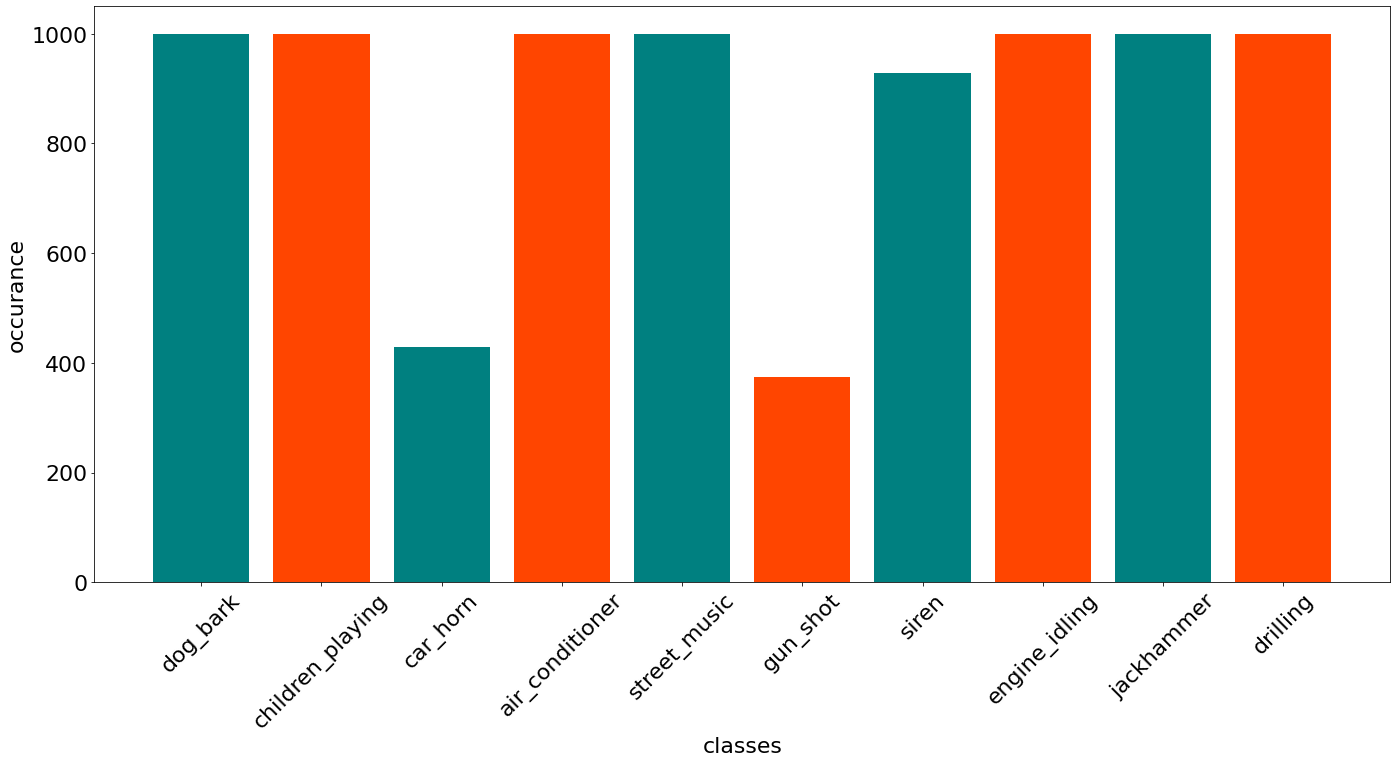

In [19]:

fig=plt.figure(figsize=(6,4))
ax=fig.add_axes([0,0,3,2])
labels=list(metadata["class"].unique())
occurance=hist_list
ax.bar(labels, hist_list, color=["teal", "orangered"])
plt.xticks(rotation=45)
plt.xlabel("classes")
plt.ylabel("occurance")
plt.savefig("class_vs_occ.pdf", bbox_inches='tight')
plt.show()


In [8]:
#Plot an MFCC of drilling
metadata.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [12]:
filename ="UrbanSound8K/audio/fold7/99812-1-4-0.wav"

In [13]:
import librosa.display as dip

In [12]:
import matplotlib.pyplot as plt

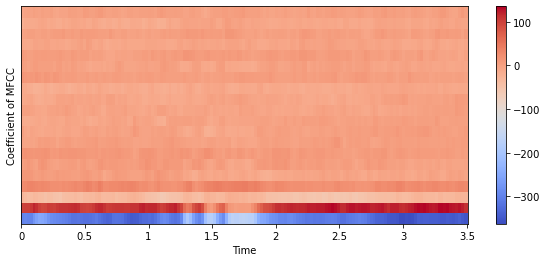

In [15]:
#mfcc of car horn 
import librosa
y, sr =librosa.load(filename)
mfccs=librosa.feature.mfcc(y , sr)
plt.figure(figsize=(10,4))
dip.specshow(mfccs , x_axis='time')
plt.ylabel('Coefficient of MFCC')
plt.colorbar()
plt.savefig("mfcc.pdf", bbox_inches="tight")

In [15]:
mfccs

array([[-297.4299    , -293.2348    , -297.87338   , ..., -338.08334   ,
        -345.3919    , -352.47012   ],
       [  99.2291    ,  100.57094   ,  100.41075   , ...,  128.58336   ,
         123.02803   ,  113.800896  ],
       [ -28.023825  ,  -34.6601    ,  -40.865173  , ...,  -25.422596  ,
         -26.586838  ,  -27.514164  ],
       ...,
       [  -1.4245396 ,    0.83669364,    2.4832091 , ...,    5.670185  ,
           0.5757351 ,    8.419672  ],
       [ -17.954378  ,  -12.017621  ,  -11.592312  , ...,   -2.3170366 ,
          -3.0423112 ,   -2.8666782 ],
       [  -5.7168636 ,   -2.2399642 ,    1.0514954 , ...,    4.2743616 ,
           9.520977  ,    4.8787527 ]], dtype=float32)

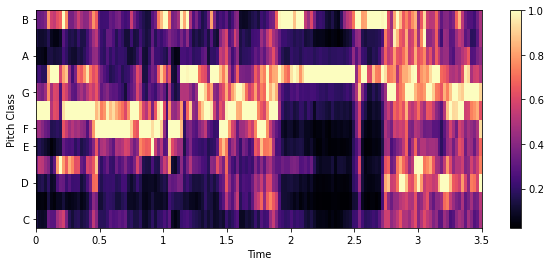

In [16]:
chroma_stft=librosa.feature.chroma_stft(y, sr)
plt.figure(figsize=(10,4))
dip.specshow(chroma_stft ,y_axis='chroma', x_axis='time')
plt.ylabel('Pitch Class')
plt.colorbar()
plt.savefig("chroma.pdf", bbox_inches="tight")

In [14]:
import librosa
y, sr =librosa.load(filename)
chroma_stft =librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=50)
mfccs=librosa.feature.mfcc(y=y, sr=sr , n_mfcc=50)

In [18]:
print(chroma_stft.shape, mfccs.shape)

(50, 151) (50, 151)


In [19]:
import numpy as np
MC=np.hstack([mfccs, chroma_stft])

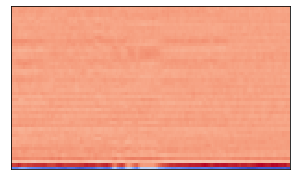

In [21]:
plt.figure(figsize=(5,3))
dip.specshow(mfccs)
plt.savefig("mfcc_combine.jpg", bbox_inches="tight")

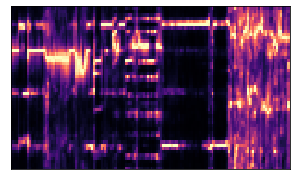

In [22]:
plt.figure(figsize=(5,3))
dip.specshow(chroma_stft)
plt.savefig("chroma_combine.jpg", bbox_inches="tight")

In [22]:
chroma_stft.shape

(50, 151)

In [23]:
mfccs.shape

(50, 151)

In [24]:
# Visualizing the model

In [ ]:
%pip install visualkeras

In [ ]:
import visualkeras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, LSTM, TimeDistributed, BatchNormalization
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import np_utils
from sklearn import metrics

In [ ]:
model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(20,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

In [165]:
input = Input(shape=(20, 5, 1))
#label = Input(shape=(10,))

model=Sequential()
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(20,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())

In [166]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 20, 5, 64)         1664      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 2, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 5, 2, 128)         512       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)             

In [167]:
visualkeras.layered_view(model).show() # display using your system viewer

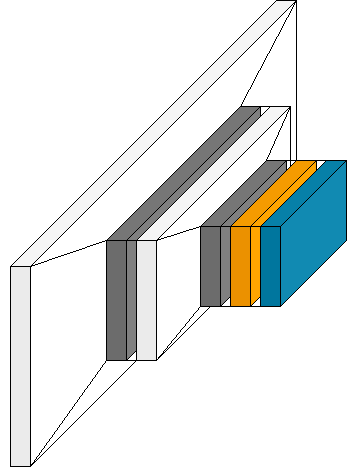

In [171]:
#custom coloring
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'white'
color_map[MaxPooling2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'orange'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map, type_ignore=[Input, Dense, Flatten], scale_xy=40)

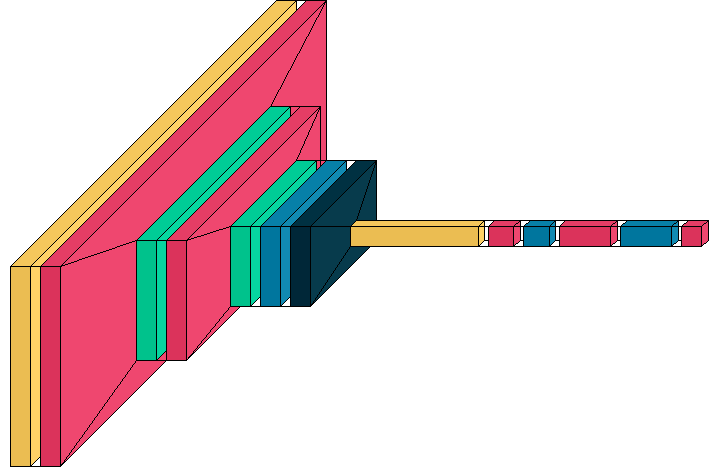

In [146]:
visualkeras.layered_view(model, scale_xy=40)

In [141]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 5, 1)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 20, 5, 64)         1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 3, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 2, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 2, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 2, 128)        

<ipython-input-143-de66d5aa701c>:208: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


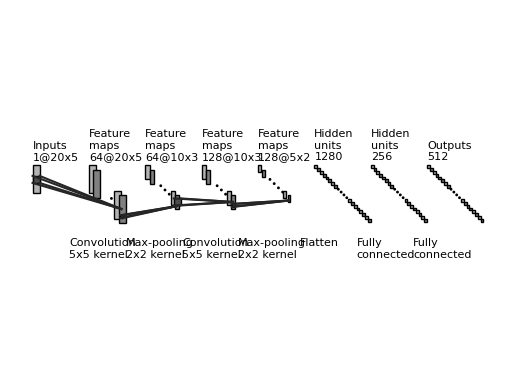

In [143]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.


def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
                            loc_diff=[3, -3],
                            ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(
                Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.5))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff,
                                     size[1], size[0]))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, end_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                    - start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0])]
                   )




    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) * np.array(
            loc_diff_list[ind_bgn + 1]) \
        + np.array([end_ratio[0] * size_list[ind_bgn + 1][1],
                    - end_ratio[1] * size_list[ind_bgn + 1][0]])


    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0]))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]]))
    colors.append(Darker)



def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


if __name__ == '__main__':

    fc_unit_size = 2
    layer_width = 40
    flag_omit = True

    patches = []
    colors = []

    fig, ax = plt.subplots()


    ############################
    # conv layers
    size_list = [(20, 5), (20, 5), (10, 3), (10, 3), (5, 2)]
    num_list = [1, 64, 64, 128, 128]
    x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
    text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
    loc_diff_list = [[3, -3]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)-1,-1,-1):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumConvMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
            num_list[ind], size_list[ind][0], size_list[ind][1]))

    ############################
    # in between layers
    start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    patch_size_list = [(5, 5), (2, 2), (5, 5), (2, 2)]
    ind_bgn_list = range(len(patch_size_list))
    text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']

    for ind in range(len(patch_size_list)):
        add_mapping(
            patches, colors, start_ratio_list[ind], end_ratio_list[ind],
            patch_size_list[ind], ind,
            top_left_list, loc_diff_list, num_show_list, size_list)
        label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
            patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=[26, -65]
        )


    ############################
    # fully connected layers
    size_list = [(fc_unit_size, fc_unit_size)] * 3
    num_list = [1280, 256, 512, 10]
    num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
    x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
    loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
    text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

    for ind in range(len(size_list)):
        if flag_omit:
            add_layer_with_omission(patches, colors, size=size_list[ind],
                                    num=num_list[ind],
                                    num_max=NumFcMax,
                                    num_dots=NumDots,
                                    top_left=top_left_list[ind],
                                    loc_diff=loc_diff_list[ind])
        else:
            add_layer(patches, colors, size=size_list[ind],
                      num=num_show_list[ind],
                      top_left=top_left_list[ind],
                      loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}'.format(
            num_list[ind]))

    text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected', 'Fully\nconnected']

    for ind in range(len(size_list)):
        label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color * np.ones(3))
        if isinstance(patch, Line2D):
            ax.add_line(patch)
        else:
            patch.set_edgecolor(Black * np.ones(3))
            ax.add_patch(patch)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    fig.set_size_inches(8, 2.5)

    fig_dir = './'
    fig_ext = '.png'
    #fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
                #bbox_inches='tight', pad_inches=0)

In [172]:
from keras.optimizers import Adam
a=Adam()

In [174]:
a.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}